In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import tensorflow as tf
import numpy as np
import scipy
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime
import os
import cv2

from tqdm import tqdm
from tensorflow import keras
from datetime import timedelta

from tensorflow.keras.layers import Input, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from zipfile import ZipFile
import cv2
import urllib
import requests
import PIL.Image
import numpy as np
from bs4 import BeautifulSoup

In [14]:
from google.colab import files
uploaded = files.upload()

Saving Training.zip to Training.zip


In [30]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['Training.zip']), 'r')
data.extractall()
!ls Training
!cd Training
!pwd

train
/content


In [32]:
train_data_dir = '/content/Training/train'
class_names = [item for item in os.listdir(train_data_dir) if os.path.isdir(os.path.join(train_data_dir, item))]
nb_train_samples = sum([len(files) for _, _, files in os.walk(train_data_dir)])
nb_classes = len(class_names)      # number of output classes

print('Training a CNN Multi-Classifier Model ......')
print('\n - names of classes: ', class_names, '\n - # of classes: ', nb_classes)
print(' - # of training samples: ', nb_train_samples)

Training a CNN Multi-Classifier Model ......

 - names of classes:  ['angry', 'neutral', 'sad', 'disgust', 'surprise', 'happy', 'fear'] 
 - # of classes:  7
 - # of training samples:  27819


In [33]:
uploaded = files.upload()

Saving Data_test.zip to Data_test.zip


In [36]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['Data_test.zip']), 'r')
data.extractall()

In [37]:
test_data_dir = 'Data_test/Test'
nb_test_samples = sum([len(files) for _, _, files in os.walk(test_data_dir)])

print('Test a CNN Multi-Classifier Model ......')
print(' - # of test samples: ', nb_test_samples)

Test a CNN Multi-Classifier Model ......
 - # of test samples:  5318


In [ ]:
!git clone https://github.com/bakhbyergyen7/FinalProject.git
%cd FinalProject/project_1_dataset
!ls

Cloning into 'FinalProject'...
remote: Enumerating objects: 27793, done.
remote: Counting objects: 100% (309/309), done.
remote: Compressing objects: 100% (251/251), done.
remote: Total 27793 (delta 173), reused 122 (delta 52), pack-reused 27484
Receiving objects: 100% (27793/27793), 47.26 MiB | 30.94 MiB/s, done.
Resolving deltas: 100% (177/177), done.
Updating files: 100% (28320/28320), done.
/content/FinalProject/project_1_dataset
test  train


In [38]:
# train_data_dir = '/content/FinalProject/project_1_dataset/train'
# test_data_dir = '/content/FinalProject/project_1_dataset/test'
# class_names = [item for item in os.listdir(train_data_dir) if os.path.isdir(os.path.join(train_data_dir, item))]

row = 48
col = 48
Epochs = 200
Batch_size = 120

In [39]:
train_datagen = ImageDataGenerator(rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1,
                  validation_split=0.2)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(row, col),
                                                    color_mode="grayscale",
                                                    batch_size=Batch_size,
                                                    seed=1,
                                                    shuffle=True,
                                                    class_mode="categorical",
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(row, col),
                                                    color_mode="grayscale",
                                                    batch_size=Batch_size,
                                                    seed=1,
                                                    shuffle=True,
                                                    class_mode="categorical",
                                                    subset='validation')

test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                    target_size=(row, col),
                                                    color_mode="grayscale",
                                                    batch_size=Batch_size,
                                                    seed=7,
                                                    shuffle=False,
                                                    class_mode="categorical"
                                                    )
nb_classes = len(class_names)
nb_train_samples = train_generator.samples
nb_val_samples = validation_generator.samples
nb_test_samples = test_generator.samples

print()
print('Training a Multi-Classifier Model')
print('Number of classes: ', nb_classes)
print('Names of classes: ', class_names)

print()
print('Number of training samples: ', nb_train_samples)
print('Number of test samples: ', nb_test_samples)

Found 22257 images belonging to 7 classes.
Found 5562 images belonging to 7 classes.
Found 5318 images belonging to 7 classes.

Training a Multi-Classifier Model
Number of classes:  7
Names of classes:  ['angry', 'neutral', 'sad', 'disgust', 'surprise', 'happy', 'fear']

Number of training samples:  22257
Number of test samples:  5318


In [ ]:
import os;
print(os.getcwd())

/content/FinalProject/project_1_dataset


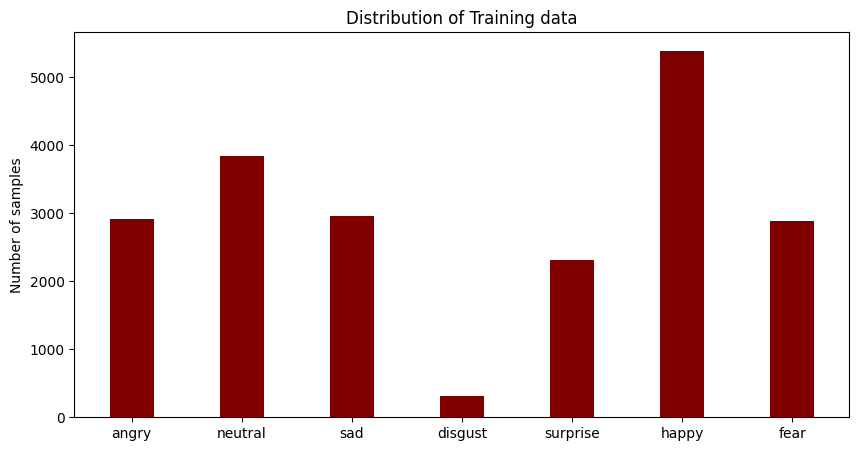

In [ ]:
# Bar plot
fig = plt.figure(figsize = (10, 5))
values = [len(files) for _, _, files in os.walk(train_data_dir)][1:]

# creating the bar plot
plt.bar(class_names, values, color ='maroon', width = 0.4)

plt.xlabel("")
plt.ylabel("Number of samples")
plt.title("Distribution of Training data")
plt.show()

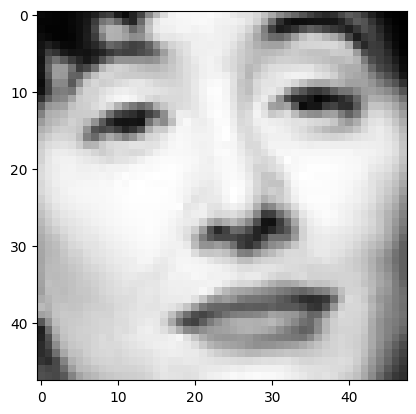

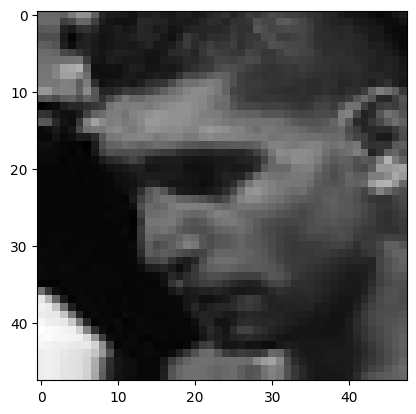

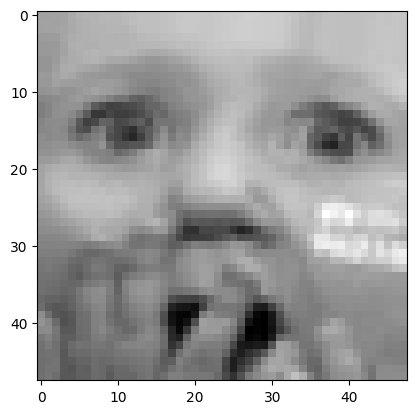

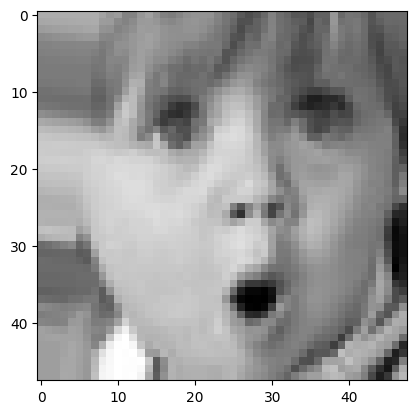

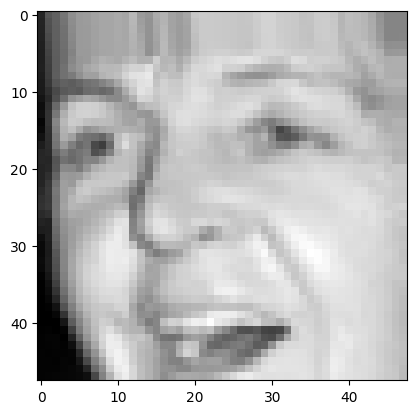

In [ ]:
for i in range(0,5):
    x, y = next(train_generator)
    image = x[i]
    plt.imshow(image, cmap='gray')
    plt.show()

In [40]:
class AlexNet(Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()
        self.add(Conv2D(16, kernel_size=(3, 3), padding='same', strides=1, activation='relu', input_shape =input_shape))
        self.add(BatchNormalization())
        self.add(MaxPooling2D(3,2))

        self.add(Conv2D(32, kernel_size=(3, 3), strides=1, activation='relu', padding='same'))
        self.add(BatchNormalization())
        self.add(MaxPooling2D(3, 2))

        self.add(Conv2D(64, kernel_size=(2, 2), strides=1, activation='relu', padding='same'))
        self.add(Conv2D(128, kernel_size=(2, 2), strides=1, activation='relu'))
        self.add(MaxPooling2D(pool_size=(3, 3), strides=1))
        self.add(Dropout(0.25))

        self.add(Conv2D(128, kernel_size=(2, 2), strides=1, activation='relu', padding='same'))
        self.add(Flatten())
        self.add(Dense(256, activation='relu'))
        self.add(Dropout(0.25))

        self.add(Dense(num_classes, activation='softmax'))

        self.compile(optimizer= tf.keras.optimizers.Adam(0.0001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [41]:
model = AlexNet((row,col,1), nb_classes)
log_dir="./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
callback_list = [tensorboard_callback]

model.summary()

Model: "alex_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        160       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 16)        64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (None, 23, 23, 32)        128       
 chNormalization)                                                
                                                          

In [44]:
model_dir = "D:\Shriraj\4sem\into_to_ML\my_model.h5"
history = model.fit(train_generator,
                    epochs=Epochs,
                    steps_per_epoch=nb_train_samples // Batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_val_samples // Batch_size,
                    callbacks=callback_list,
                    verbose=1)


Epoch 1/200
185/185 [==============================] - 18s 99ms/step - loss: 1.2729 - accuracy: 0.5176 - val_loss: 1.2777 - val_accuracy: 0.5105
Epoch 2/200
185/185 [==============================] - 18s 98ms/step - loss: 1.2615 - accuracy: 0.5209 - val_loss: 1.2757 - val_accuracy: 0.5120
Epoch 3/200
185/185 [==============================] - 18s 99ms/step - loss: 1.2438 - accuracy: 0.5258 - val_loss: 1.2515 - val_accuracy: 0.5266
Epoch 4/200
185/185 [==============================] - 18s 99ms/step - loss: 1.2231 - accuracy: 0.5386 - val_loss: 1.2584 - val_accuracy: 0.5246
Epoch 5/200
185/185 [==============================] - 18s 99ms/step - loss: 1.2134 - accuracy: 0.5442 - val_loss: 1.2349 - val_accuracy: 0.5301
Epoch 6/200
185/185 [==============================] - 18s 98ms/step - loss: 1.1974 - accuracy: 0.5437 - val_loss: 1.2339 - val_accuracy: 0.5326
Epoch 7/200
185/185 [==============================] - 18s 98ms/step - loss: 1.1890 - accuracy: 0.5512 - val_loss: 1.2504 - val_ac

In [45]:
model_dir = "./my_model.h5"
model.save(model_dir)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


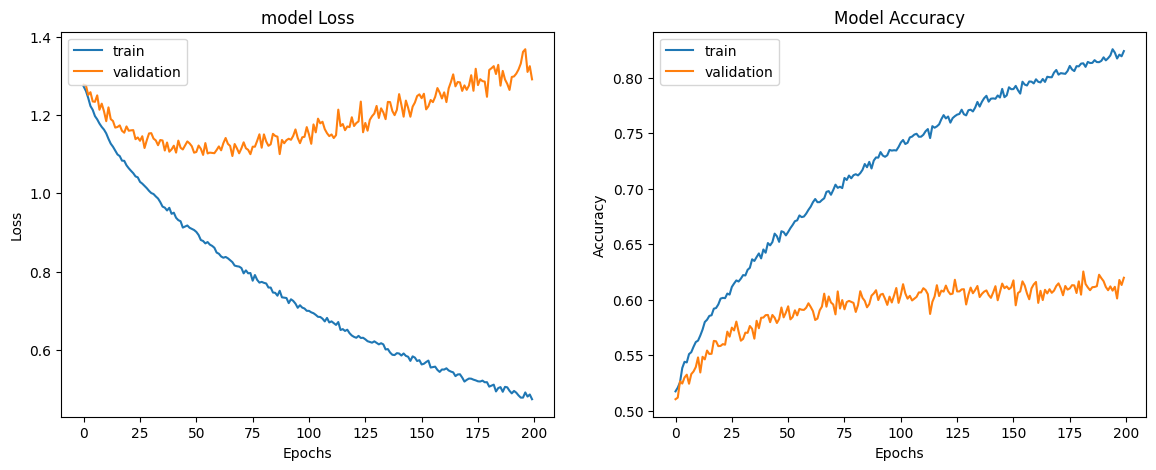

In [46]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [47]:
output = model.predict(test_generator)
y_classes = output.argmax(axis=-1)
result = sum(y_classes==test_generator.classes)/nb_test_samples*100
print(result)

45/45 [==============================] - 2s 33ms/step
86.94998119593832


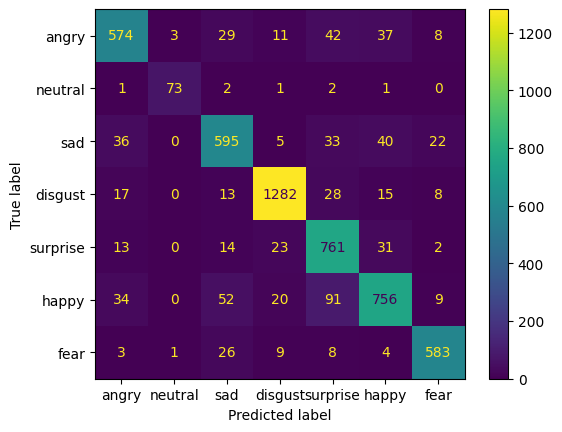

In [48]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(test_generator.classes, y_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = class_names)
cm_display.plot()
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the model
model = load_model('my_model.h5')

# Assuming your test data is in a directory and organized by class directories
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values

# Create a generator for your test data
test_generator = test_datagen.flow_from_directory(
    'path_to_your_test_data_directory',
    target_size=(48, 48),  # Assuming the model was trained with this image size
    color_mode='grayscale',  # If your model was trained on grayscale images
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Predict the emotions on the test set
predictions = model.predict(test_generator)

# Assuming you have categorical labels, get the index of the max probability
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes
true_classes = test_generator.classes

# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(true_classes, predicted_classes)
print(f'Accuracy: {accuracy}')

# Optionally, display a confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


ValueError: Unknown layer: 'AlexNet'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.